In [116]:
#pip install yfinance

In [117]:
import yfinance as yf

# yfinance 데이터 불러오기
stock_price = yf.download({'005930.KS','^KS11'}, '2019-01-01', '2022-01-01', period='1d') #^KS11: 코스피
#period='1d' 는 하루씩
#1년치 데이터
stock_price

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
               005930.KS        ^KS11 005930.KS        ^KS11 005930.KS   
Date                                                                     
2019-01-02  34482.312500  2010.000000   38750.0  2010.000000   39400.0   
2019-01-03  33458.972656  1993.699951   37600.0  1993.699951   38550.0   
2019-01-04  33325.488281  2010.250000   37450.0  2010.250000   37600.0   
2019-01-07  34482.312500  2037.099976   38750.0  2037.099976   38900.0   
2019-01-08  33903.902344  2025.270020   38100.0  2025.270020   39200.0   
...                  ...          ...       ...          ...       ...   
2021-12-24  78211.703125  3012.429932   80500.0  3012.429932   80800.0   
2021-12-27  77920.242188  2999.550049   80200.0  2999.550049   80600.0   
2021-12-28  78017.390625  3020.239990   80300.0  3020.239990   80400.0   
2021-12-29  76905.765625  2993.290039   78800.0  2993.290039   80200.0   
2021-12-30  76417.789062  2977.649902   78300.0  2977.649902   79500.0   

                              Low                   Open               \
                  ^KS11 005930.KS        ^KS11 005930.KS        ^KS11   
Date                                                                    
2019-01-02  2053.449951   38550.0  2004.270020   39400.0  2050.550049   
2019-01-03  2014.719971   37450.0  1991.650024   38300.0  2011.810059   
2019-01-04  2011.560059   36850.0  1984.530029   37450.0  1992.400024   
2019-01-07  2048.060059   37800.0  2030.900024   38000.0  2034.239990   
2019-01-08  2042.699951   37950.0  2023.589966   38000.0  2038.680054   
...                 ...       ...          ...       ...          ...   
2021-12-24  3025.770020   80200.0  3009.479980   80200.0  3009.479980   
2021-12-27  3017.310059   79800.0  2999.300049   80600.0  3013.939941   
2021-12-28  3020.290039   79700.0  2991.550049   80200.0  3006.770020   
2021-12-29  3007.719971   78500.0  2988.669922   80200.0  3002.899902   
2021-12-30  3005.360107   78100.0  2975.739990   78900.0  2999.750000   

              Volume          
           005930.KS   ^KS11  
Date                          
2019-01-02   7847664  326400  
2019-01-03  12471493  428000  
2019-01-04  14108958  409000  
2019-01-07  12748997  440200  
2019-01-08  12756554  397800  
...              ...     ...  
2021-12-24  12086380  537500  
2021-12-27  10783368  475000  
2021-12-28  18226325  607000  
2021-12-29  19794795  545800  
2021-12-30  14236700  460600  

[742 rows x 12 columns]

In [118]:
stock_price.isna().sum()

Adj Close  005930.KS    0
           ^KS11        0
Close      005930.KS    0
           ^KS11        0
High       005930.KS    0
           ^KS11        0
Low        005930.KS    0
           ^KS11        0
Open       005930.KS    0
           ^KS11        0
Volume     005930.KS    0
           ^KS11        0
dtype: int64

In [119]:
stock_price1 = stock_price.reset_index()

In [120]:
stock_price1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   (Date, )                742 non-null    datetime64[ns]
 1   (Adj Close, 005930.KS)  742 non-null    float64       
 2   (Adj Close, ^KS11)      742 non-null    float64       
 3   (Close, 005930.KS)      742 non-null    float64       
 4   (Close, ^KS11)          742 non-null    float64       
 5   (High, 005930.KS)       742 non-null    float64       
 6   (High, ^KS11)           742 non-null    float64       
 7   (Low, 005930.KS)        742 non-null    float64       
 8   (Low, ^KS11)            742 non-null    float64       
 9   (Open, 005930.KS)       742 non-null    float64       
 10  (Open, ^KS11)           742 non-null    float64       
 11  (Volume, 005930.KS)     742 non-null    int64         
 12  (Volume, ^KS11)         742 non-null    int64     

In [121]:
start_date2 = stock_price1['Date'].astype(str).iloc[0]
end_date2 = stock_price1['Date'].astype(str).iloc[-1]

In [122]:
print(start_date2)
print(end_date2)

2019-01-02
2021-12-30


In [123]:
import pandas as pd
pd.date_range(start_date2, end_date2, freq='B') #str -> Datetime, freq='B': 비즈니스 데이(공유일을 제외한
# 평일로 날짜 생성)

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-24', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', length=782, freq='B')

In [124]:
test = pd.date_range(start_date2, end_date2, freq='B').to_frame()
test #인덱스가 같은 것으로 같이 나온다.

,0
2019-01-02,2019-01-02
2019-01-03,2019-01-03
2019-01-04,2019-01-04
2019-01-07,2019-01-07
2019-01-08,2019-01-08
...,...
2021-12-24,2021-12-24
2021-12-27,2021-12-27
2021-12-28,2021-12-28
2021-12-29,2021-12-29


In [125]:
test.columns

Int64Index([0], dtype='int64')

In [126]:
pd.DataFrame(pd.date_range(start_date2, end_date2, freq='B'))

,0
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-07
4,2019-01-08
...,...
777,2021-12-24
778,2021-12-27
779,2021-12-28
780,2021-12-29


In [127]:
date_all2 = pd.DataFrame(pd.date_range(start_date2, end_date2, freq='B')).rename(columns={0:'Date'})

In [128]:
# 날짜 처음과 끝에서 영업일 기준 freq 적용 후 데이터 프레임 형성
date_all2
# 그냥.. 인덱스를 그냥 컬럼으로 만드는 과정?

,Date
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-07
4,2019-01-08
...,...
777,2021-12-24
778,2021-12-27
779,2021-12-28
780,2021-12-29


In [129]:
date_all2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    782 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.2 KB


In [130]:
pd.date_range(start_date2, end_date2, freq='BM') #BM: 비즈니스 월별

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-29', '2019-04-30',
               '2019-05-31', '2019-06-28', '2019-07-31', '2019-08-30',
               '2019-09-30', '2019-10-31', '2019-11-29', '2019-12-31',
               '2020-01-31', '2020-02-28', '2020-03-31', '2020-04-30',
               '2020-05-29', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-30', '2020-11-30', '2020-12-31',
               '2021-01-29', '2021-02-26', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-30', '2021-08-31',
               '2021-09-30', '2021-10-29', '2021-11-30'],
              dtype='datetime64[ns]', freq='BM')

1. 인덱스를 문자열로 바꿔서 년-월 까지 나와있는 새로운 파생변수를 만든다.

In [131]:
from datetime import datetime

In [132]:
def change(x):
    return datetime.strftime(x, '%Y-%m')

stock_price['STD-YM'] = list(map(change, stock_price.index))

In [133]:
stock_price.head(1)

Adj Close             Close              High               \
             005930.KS   ^KS11 005930.KS   ^KS11 005930.KS        ^KS11   
Date                                                                      
2019-01-02  34482.3125  2010.0   38750.0  2010.0   39400.0  2053.449951   

                 Low                  Open                 Volume          \
           005930.KS       ^KS11 005930.KS        ^KS11 005930.KS   ^KS11   
Date                                                                        
2019-01-02   38550.0  2004.27002   39400.0  2050.550049   7847664  326400   

             STD-YM  
                     
Date                 
2019-01-02  2019-01

In [134]:
stock_price[['STD-YM']]

,STD-YM
,
Date,
2019-01-02,2019-01
2019-01-03,2019-01
2019-01-04,2019-01
2019-01-07,2019-01
2019-01-08,2019-01
...,...
2021-12-24,2021-12
2021-12-27,2021-12


In [135]:
stock_price['STD-YM'].shift(-1)

Date
2019-01-02    2019-01
2019-01-03    2019-01
2019-01-04    2019-01
2019-01-07    2019-01
2019-01-08    2019-01
               ...   
2021-12-24    2021-12
2021-12-27    2021-12
2021-12-28    2021-12
2021-12-29    2021-12
2021-12-30        NaN
Name: STD-YM, Length: 742, dtype: object

In [136]:
stock_price

Adj Close                  Close                   High  \
               005930.KS        ^KS11 005930.KS        ^KS11 005930.KS   
Date                                                                     
2019-01-02  34482.312500  2010.000000   38750.0  2010.000000   39400.0   
2019-01-03  33458.972656  1993.699951   37600.0  1993.699951   38550.0   
2019-01-04  33325.488281  2010.250000   37450.0  2010.250000   37600.0   
2019-01-07  34482.312500  2037.099976   38750.0  2037.099976   38900.0   
2019-01-08  33903.902344  2025.270020   38100.0  2025.270020   39200.0   
...                  ...          ...       ...          ...       ...   
2021-12-24  78211.703125  3012.429932   80500.0  3012.429932   80800.0   
2021-12-27  77920.242188  2999.550049   80200.0  2999.550049   80600.0   
2021-12-28  78017.390625  3020.239990   80300.0  3020.239990   80400.0   
2021-12-29  76905.765625  2993.290039   78800.0  2993.290039   80200.0   
2021-12-30  76417.789062  2977.649902   78300.0  2977.649902   79500.0   

                              Low                   Open               \
                  ^KS11 005930.KS        ^KS11 005930.KS        ^KS11   
Date                                                                    
2019-01-02  2053.449951   38550.0  2004.270020   39400.0  2050.550049   
2019-01-03  2014.719971   37450.0  1991.650024   38300.0  2011.810059   
2019-01-04  2011.560059   36850.0  1984.530029   37450.0  1992.400024   
2019-01-07  2048.060059   37800.0  2030.900024   38000.0  2034.239990   
2019-01-08  2042.699951   37950.0  2023.589966   38000.0  2038.680054   
...                 ...       ...          ...       ...          ...   
2021-12-24  3025.770020   80200.0  3009.479980   80200.0  3009.479980   
2021-12-27  3017.310059   79800.0  2999.300049   80600.0  3013.939941   
2021-12-28  3020.290039   79700.0  2991.550049   80200.0  3006.770020   
2021-12-29  3007.719971   78500.0  2988.669922   80200.0  3002.899902   
2021-12-30  3005.360107   78100.0  2975.739990   78900.0  2999.750000   

              Volume           STD-YM  
           005930.KS   ^KS11           
Date                                   
2019-01-02   7847664  326400  2019-01  
2019-01-03  12471493  428000  2019-01  
2019-01-04  14108958  409000  2019-01  
2019-01-07  12748997  440200  2019-01  
2019-01-08  12756554  397800  2019-01  
...              ...     ...      ...  
2021-12-24  12086380  537500  2021-12  
2021-12-27  10783368  475000  2021-12  
2021-12-28  18226325  607000  2021-12  
2021-12-29  19794795  545800  2021-12  
2021-12-30  14236700  460600  2021-12  

[742 rows x 13 columns]

In [137]:
stock_price = stock_price.loc[stock_price['STD-YM'] != stock_price['STD-YM'].shift(-1)]

In [138]:
stock_price = stock_price.drop("STD-YM", axis=1)

In [139]:
stock_price.pct_change() #(현재행-이전행) / 이전행

Adj Close               Close                High            \
           005930.KS     ^KS11 005930.KS     ^KS11 005930.KS     ^KS11   
Date                                                                     
2019-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
2019-02-28 -0.022752 -0.004268 -0.022752 -0.004268 -0.011690  0.004971   
2019-03-29 -0.002189 -0.024947 -0.009978 -0.024947 -0.034409 -0.040570   
2019-04-30  0.026876  0.029393  0.026876  0.029393  0.031180  0.033812   
2019-05-31 -0.073064 -0.073448 -0.073064 -0.073448 -0.075594 -0.075310   
2019-06-28  0.114516  0.043532  0.105882  0.043532  0.098131  0.044092   
2019-07-31 -0.035106 -0.049784 -0.035106 -0.049784 -0.008511 -0.045848   
2019-08-30 -0.029768 -0.028036 -0.029768 -0.028036 -0.049356 -0.034270   
2019-09-30  0.122852  0.048410  0.114773  0.048410  0.111738  0.047575   
2019-10-31  0.027523  0.009903  0.027523  0.009903  0.043655  0.018751   
2019-11-29 -0.001984  0.002150 -0.001984  0.002150  0.000000  0.010372   
2019-12-30  0.116478  0.052544  0.109344  0.052544  0.101167  0.038819   
2020-01-31  0.010753 -0.035792  0.010753 -0.035792  0.031802 -0.018482   
2020-02-28 -0.039007 -0.062293 -0.039007 -0.062293 -0.049658 -0.062854   
2020-03-31 -0.112499 -0.116945 -0.119004 -0.116945 -0.126126 -0.134514   
2020-04-29  0.047120  0.109949  0.047120  0.109949  0.041237  0.113607   
2020-05-29  0.014000  0.042124  0.014000  0.042124  0.003960  0.041573   
2020-06-30  0.048383  0.038791  0.041420  0.038791  0.063116  0.046834   
2020-07-31  0.096591  0.066897  0.096591  0.066897  0.105751  0.068887   
2020-08-31 -0.067358  0.034143 -0.067358  0.034143 -0.058725  0.043872   
2020-09-29  0.084408  0.000739  0.077778  0.000739  0.051693 -0.017497   
2020-10-30 -0.027491 -0.026092 -0.027491 -0.026092 -0.016949 -0.008390   
2020-11-30  0.178445  0.142995  0.178445  0.142995  0.182759  0.141565   
2020-12-30  0.244955  0.108874  0.214393  0.108874  0.185131  0.086666   
2021-01-29  0.012346  0.035755  0.012346  0.035755  0.045510  0.077135   
2021-02-26  0.006098  0.012345  0.006098  0.012345 -0.018824 -0.003461   
2021-03-31 -0.008949  0.016087 -0.013333  0.016087 -0.008393  0.001424   
2021-04-30  0.001229  0.028235  0.001229  0.028235 -0.007255  0.027648   
2021-05-31 -0.012270  0.017809 -0.012270  0.017809 -0.018270  0.007819   
2021-06-30  0.006923  0.028952  0.002484  0.028952  0.009926  0.031658   
2021-07-30 -0.027262 -0.028623 -0.027261 -0.028623 -0.030713 -0.021499   
2021-08-31 -0.022930 -0.000952 -0.022930 -0.000952 -0.027883 -0.010749   
2021-09-30 -0.029306 -0.040775 -0.033898 -0.040775 -0.024772 -0.037645   
2021-10-29 -0.058030 -0.031980 -0.058030 -0.031980 -0.042781 -0.015996   
2021-11-30  0.021490 -0.044323  0.021490 -0.044323  0.032123 -0.028790   
2021-12-30  0.103136  0.048834  0.098177  0.048834  0.075778  0.021214   

                 Low                Open              Volume            
           005930.KS     ^KS11 005930.KS     ^KS11 005930.KS     ^KS11  
Date                                                                    
2019-01-31       NaN       NaN       NaN       NaN       NaN       NaN  
2019-02-28 -0.022752 -0.002626 -0.005359  0.003914  0.090105 -0.064563  
2019-03-29 -0.019956 -0.032508 -0.040948 -0.041733 -0.512429 -0.285098  
2019-04-30  0.026018  0.029312  0.033708  0.035063 -0.032235  0.046078  
2019-05-31 -0.070562 -0.074719 -0.073913 -0.083310  0.022005  0.151547  
2019-06-28  0.107948  0.049927  0.103286  0.052257  0.139295  0.223361  
2019-07-31 -0.036403 -0.053212 -0.017021 -0.046181 -0.005893  0.096966  
2019-08-30 -0.027778 -0.029663 -0.053030 -0.041641 -0.231015 -0.460977  
2019-09-30  0.094857  0.046487  0.098286  0.048220 -0.040605  0.031161  
2019-10-31  0.050104  0.020308  0.061394  0.021239  0.085042  0.408120  
2019-11-29 -0.001988  0.000778  0.003922  0.017380  0.084869 -0.060698  
2019-12-30  0.109562  0.053019  0.097656  0.036269 -0.252481 -0.039003  
2020-01-31  0.012567 -0.03490

In [140]:
stock_price.pct_change().isna().sum() #첫번째 행

Adj Close  005930.KS    1
           ^KS11        1
Close      005930.KS    1
           ^KS11        1
High       005930.KS    1
           ^KS11        1
Low        005930.KS    1
           ^KS11        1
Open       005930.KS    1
           ^KS11        1
Volume     005930.KS    1
           ^KS11        1
dtype: int64

In [141]:
# 전일대비 수익률 도출 (pct_change 사용, %로 표현하기 위해 100을 곱해준다)
stock_price = stock_price.pct_change().dropna()
#stock_price = pd.DataFrame(stock_price) #이미 데이터프레임이다..
stock_price

Adj Close               Close                High            \
           005930.KS     ^KS11 005930.KS     ^KS11 005930.KS     ^KS11   
Date                                                                     
2019-02-28 -0.022752 -0.004268 -0.022752 -0.004268 -0.011690  0.004971   
2019-03-29 -0.002189 -0.024947 -0.009978 -0.024947 -0.034409 -0.040570   
2019-04-30  0.026876  0.029393  0.026876  0.029393  0.031180  0.033812   
2019-05-31 -0.073064 -0.073448 -0.073064 -0.073448 -0.075594 -0.075310   
2019-06-28  0.114516  0.043532  0.105882  0.043532  0.098131  0.044092   
2019-07-31 -0.035106 -0.049784 -0.035106 -0.049784 -0.008511 -0.045848   
2019-08-30 -0.029768 -0.028036 -0.029768 -0.028036 -0.049356 -0.034270   
2019-09-30  0.122852  0.048410  0.114773  0.048410  0.111738  0.047575   
2019-10-31  0.027523  0.009903  0.027523  0.009903  0.043655  0.018751   
2019-11-29 -0.001984  0.002150 -0.001984  0.002150  0.000000  0.010372   
2019-12-30  0.116478  0.052544  0.109344  0.052544  0.101167  0.038819   
2020-01-31  0.010753 -0.035792  0.010753 -0.035792  0.031802 -0.018482   
2020-02-28 -0.039007 -0.062293 -0.039007 -0.062293 -0.049658 -0.062854   
2020-03-31 -0.112499 -0.116945 -0.119004 -0.116945 -0.126126 -0.134514   
2020-04-29  0.047120  0.109949  0.047120  0.109949  0.041237  0.113607   
2020-05-29  0.014000  0.042124  0.014000  0.042124  0.003960  0.041573   
2020-06-30  0.048383  0.038791  0.041420  0.038791  0.063116  0.046834   
2020-07-31  0.096591  0.066897  0.096591  0.066897  0.105751  0.068887   
2020-08-31 -0.067358  0.034143 -0.067358  0.034143 -0.058725  0.043872   
2020-09-29  0.084408  0.000739  0.077778  0.000739  0.051693 -0.017497   
2020-10-30 -0.027491 -0.026092 -0.027491 -0.026092 -0.016949 -0.008390   
2020-11-30  0.178445  0.142995  0.178445  0.142995  0.182759  0.141565   
2020-12-30  0.244955  0.108874  0.214393  0.108874  0.185131  0.086666   
2021-01-29  0.012346  0.035755  0.012346  0.035755  0.045510  0.077135   
2021-02-26  0.006098  0.012345  0.006098  0.012345 -0.018824 -0.003461   
2021-03-31 -0.008949  0.016087 -0.013333  0.016087 -0.008393  0.001424   
2021-04-30  0.001229  0.028235  0.001229  0.028235 -0.007255  0.027648   
2021-05-31 -0.012270  0.017809 -0.012270  0.017809 -0.018270  0.007819   
2021-06-30  0.006923  0.028952  0.002484  0.028952  0.009926  0.031658   
2021-07-30 -0.027262 -0.028623 -0.027261 -0.028623 -0.030713 -0.021499   
2021-08-31 -0.022930 -0.000952 -0.022930 -0.000952 -0.027883 -0.010749   
2021-09-30 -0.029306 -0.040775 -0.033898 -0.040775 -0.024772 -0.037645   
2021-10-29 -0.058030 -0.031980 -0.058030 -0.031980 -0.042781 -0.015996   
2021-11-30  0.021490 -0.044323  0.021490 -0.044323  0.032123 -0.028790   
2021-12-30  0.103136  0.048834  0.098177  0.048834  0.075778  0.021214   

                 Low                Open              Volume            
           005930.KS     ^KS11 005930.KS     ^KS11 005930.KS     ^KS11  
Date                                                                    
2019-02-28 -0.022752 -0.002626 -0.005359  0.003914  0.090105 -0.064563  
2019-03-29 -0.019956 -0.032508 -0.040948 -0.041733 -0.512429 -0.285098  
2019-04-30  0.026018  0.029312  0.033708  0.035063 -0.032235  0.046078  
2019-05-31 -0.070562 -0.074719 -0.073913 -0.083310  0.022005  0.151547  
2019-06-28  0.107948  0.049927  0.103286  0.052257  0.139295  0.223361  
2019-07-31 -0.036403 -0.053212 -0.017021 -0.046181 -0.005893  0.096966  
2019-08-30 -0.027778 -0.029663 -0.053030 -0.041641 -0.231015 -0.460977  
2019-09-30  0.094857  0.046487  0.098286  0.048220 -0.040605  0.031161  
2019-10-31  0.050104  0.020308  0.061394  0.021239  0.085042  0.408120  
2019-11-29 -0.001988  0.000778  0.003922  0.017380  0.084869 -0.060698  
2019-12-30  0.109562  0.053019  0.097656  0.036269 -0.252481 -0.039003  
2020-01-31  0.012567 -0.034905  0.028470 -0.019077  1.363289  0.706292  
2020-02-28 -0.039007 -0.065214 -0.048443 -0.064996  0.521775 -0.054750  
2020-03-31 -0.130074 -0.130350

{'whiskers': [<matplotlib.lines.Line2D at 0x262d27e97f0>,
 'caps': [<matplotlib.lines.Line2D at 0x262d27e9dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x262d27e95c0>],
 'medians': [<matplotlib.lines.Line2D at 0x262d27e9fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x262d27f95c0>],
 'means': []}

c:\Python 3.7.1\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Python 3.7.1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


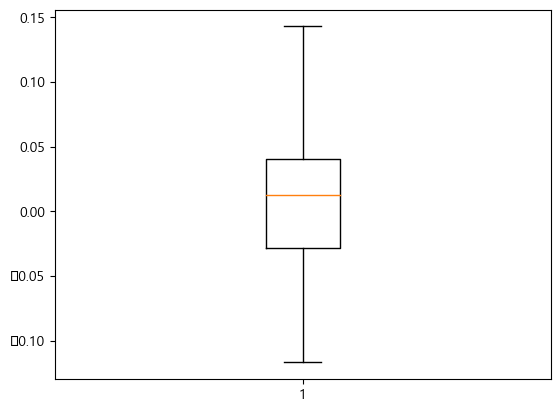

In [142]:
import matplotlib.pyplot as plt
plt.boxplot(stock_price['Adj Close']['^KS11']) 

{'whiskers': [<matplotlib.lines.Line2D at 0x262d3973f98>,
 'caps': [<matplotlib.lines.Line2D at 0x262d3823a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x262d3823278>],
 'medians': [<matplotlib.lines.Line2D at 0x262d3823cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x262d3823fd0>],
 'means': []}

c:\Python 3.7.1\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Python 3.7.1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


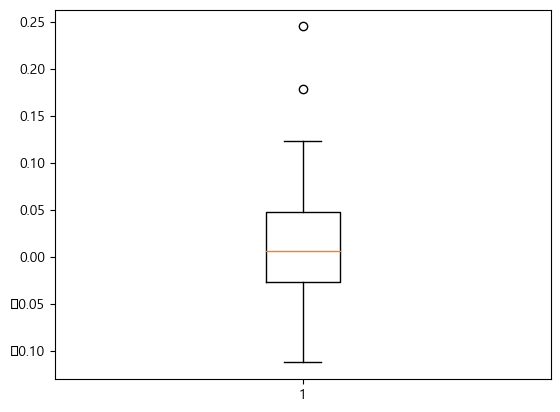

In [143]:
import matplotlib.pyplot as plt
plt.boxplot(stock_price['Adj Close']['005930.KS']) 

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
import platform
import matplotlib.pyplot as plt
if platform.system() =="Darwin": # MAC 인 경우
    plt.rc('font, family = AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')


c:\Python 3.7.1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.
c:\Python 3.7.1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


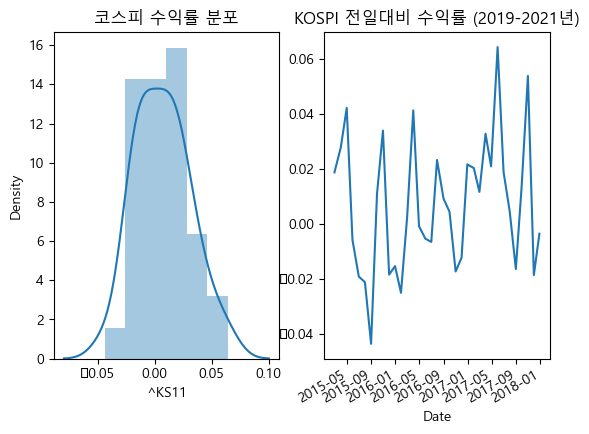

In [109]:
# 코스피 전일대비 수익률 그래프 도출

plt.subplot(1,2,1)
sns.distplot(stock_price['Adj Close']['^KS11'])
plt.title('코스피 수익률 분포')
plt.subplot(1,2,2)
stock_price['Close']['^KS11'].plot(kind='line')
plt.title('KOSPI 전일대비 수익률 (2019-2021년)')
plt.show()

c:\Python 3.7.1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.
c:\Python 3.7.1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


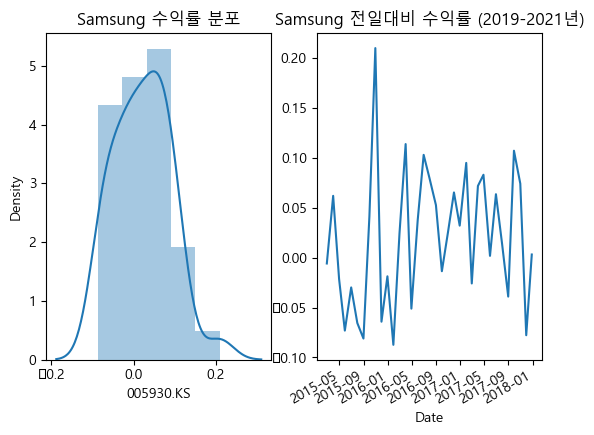

In [110]:
# 삼성전자 전일대비 수익률 그래프 도출

plt.subplot(1,2,1)
sns.distplot(stock_price['Adj Close']['005930.KS'])
plt.title('Samsung 수익률 분포')
plt.subplot(1,2,2)
stock_price['Close']['005930.KS'].plot(kind='line')
plt.title('Samsung 전일대비 수익률 (2019-2021년)')
plt.show()

In [111]:
# 정규성 검정 (모수적 특성이 존재하는지 여부 판단)

# shapiro 검정 시행
from scipy.stats import shapiro

In [112]:
shapiro(stock_price['Adj Close']['005930.KS'])

ShapiroResult(statistic=0.9654274582862854, pvalue=0.3303777873516083)

In [113]:
shapiro(stock_price['Adj Close']['^KS11'])

ShapiroResult(statistic=0.9808996915817261, pvalue=0.7880651950836182)

In [114]:
for i in ['^KS11', '005930.KS']:
    stats, pval = shapiro(stock_price['Adj Close'][i])
    
    if pval < .05:
        print(f'{i}의 경우, p값이 {pval*100 : .3f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
    else:
        print(f'{i}의 경우, p값이 {pval*100 : .3f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

^KS11의 경우, p값이  78.807% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
005930.KS의 경우, p값이  33.038% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
